Este cuaderno es la primera version del Taller 1 del curso



In [1]:
import os
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df
                                     

In [3]:
def percentil(lista):
    percentil = 0.01
    enficc = lista.quantile(q=percentil, numeric_only=True)["GHIdiario"]
    return enficc

In [8]:
def grafica(serieObjetivo,serieReferencia,serieCorregida):
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    numdatos_1 = range(len(serieObjetivo))
    numdatos_2= range(len(serieReferencia))
    numdatos_3 = range(len(serieCorregida))
    plt.hold(True)
    plt.grid(True)
    pylab.plot(numdatos_1,serieObjetivo/serieObjetivo[0],'-k', label='Serie Objetivo')
    #pylab.plot(numdatos_2,serieReferencia/serieReferencia[0],'-b', label='Serie Referencia')
    pylab.plot(numdatos_3,serieCorregida/serieCorregida[0],'-g', label='Serie Corregida')
    pylab.legend(loc='upper left')

In [9]:
def MCP(serieObjetivo,serieReferencia):
    serieCorregida=[ ]
    nombre_referencia = list(serieReferencia)[-1]
    nombre_objetivo = list(serieObjetivo)[-1]
    mu_y=np.mean(serieObjetivo[ nombre_objetivo])
    mu_x=np.mean(serieReferencia[nombre_referencia])
    sigma_y=np.std(serieObjetivo[ nombre_objetivo])
    sigma_x=np.std(serieReferencia[nombre_referencia])
    nombre_energia = list(serieReferencia)[-1]
   
    serieCorregida=(mu_y-(sigma_y/sigma_x)*(mu_x))+((sigma_y/sigma_x)*serieReferencia[nombre_energia])
     
    return serieCorregida

In [10]:
def PorCiudad(city):
    base_dir = os.path.join( '.','data')
    output_dir = os.path.join( '.','output')
    ciudad = city
    objetivo = 'IDEAM'
    refer = 'NREL'
    #Seria Objetivo
    serie_objetivo = os.path.join(base_dir,ciudad,objetivo+'.csv')
    serie_objetivo = pd.read_csv(serie_objetivo, sep = ';', encoding='latin-1')
    #Serie de Referencia
    serie_referencia = os.path.join(base_dir,ciudad,refer+'.csv')
    serie_referencia = pd.read_csv(serie_referencia,  sep = ';', encoding='latin-1')    
    #Objetivo
    ghi_mensual_objetivo = ghi_mensual(serie_objetivo )
    ghi_diario_objetivo = ghi_dia(ghi_mensual_objetivo)    
    datos_objetivo = sorted(ghi_diario_objetivo["GHIdiario"])
    #Referencia
    ghi_mensual_referencia = ghi_mensual(serie_referencia)
    ghi_diario_referencia = ghi_dia(ghi_mensual_referencia)    
    datos_referencia = sorted(ghi_diario_objetivo["GHIdiario"])
    #ENFICC
    ENFICC_objetivo=percentil(ghi_diario_objetivo)
    ENFICC_referencia=percentil(ghi_diario_referencia)
    #CORREGIDA
    correg=MCP(ghi_diario_objetivo,ghi_diario_referencia)
  
    #GRAFICA
    nombre_referencia = list(ghi_diario_objetivo)[-1]
    nombre_objetivo = list(ghi_diario_referencia)[-1]
    a=ghi_diario_objetivo[nombre_objetivo]
    b=ghi_diario_referencia[nombre_referencia]
    c=correg
    grafica(a,b,c)  
    #print(b)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


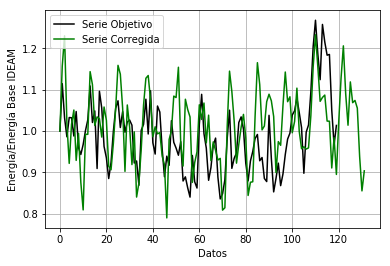

In [11]:
PorCiudad('Valledupar')